This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

In [ ]:
len(train_labels)

In [ ]:
train_labels

In [ ]:
test_images.shape

In [ ]:
len(test_labels)

In [ ]:
test_labels

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

In [ ]:
predictions[0].argmax()

In [ ]:
predictions[0][7]

In [ ]:
test_labels[0]

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

## Data representations for neural networks

### Scalars (rank-0 tensors)

In [12]:
import numpy as np
x = np.array(12)
x

array(12)

In [13]:
x.ndim

0

### Vectors (rank-1 tensors)

In [14]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [15]:
x.ndim

1

### Matrices (rank-2 tensors)

In [16]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [17]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
train_images.ndim

3

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

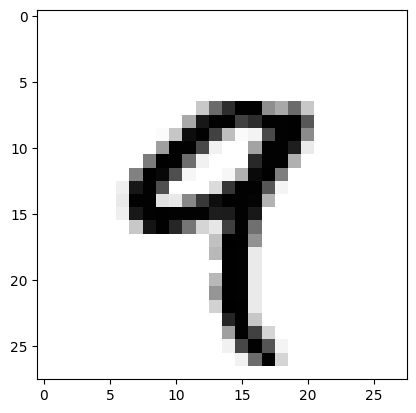

In [22]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [23]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [24]:
batch = train_images[:128]

In [25]:
batch = train_images[128:256]

In [26]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [27]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [28]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [29]:
import time  # Import the time module to measure execution time
import numpy as np  # Import NumPy for numerical operations

# Create two random 2D arrays (matrices) of shape (20, 100)
x = np.random.random((20, 100))
y = np.random.random((20, 100))

# Record the current time before starting the operation
t0 = time.time()

# Repeat the operation 1000 times to measure performance
for _ in range(1000):
    # Perform element-wise addition of the two matrices
    z = x + y

    # Apply the element-wise maximum function to ensure all values are non-negative
    # This replaces any negative values in the result with 0
    z = np.maximum(z, 0.)

# Calculate the total time taken for the operations and print it
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [30]:
t0 = time.time()

# Repeat the operation 1000 times to measure performance
for _ in range(1000):
    # Perform element-wise addition using the naive_add function
    z = naive_add(x, y)

    # Apply the naive ReLU function to ensure all values are non-negative
    z = naive_relu(z)

# Calculate the total time taken for the operations and print it
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.97 s


### Broadcasting

In [31]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [32]:
y = np.expand_dims(y, axis=0)

In [33]:
y

array([[0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989]])

In [34]:
Y = np.concatenate([y] * 32, axis=0)
Y

array([[0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.78179327, 0.07362523, 0.90292271,
        0.4621816 , 0.80628273, 0.95993849, 0.78453987, 0.42403989],
       [0.66073103, 0.21085662, 0.7817932

In [44]:
def naive_add_matrix_and_vector(x, y):
    # Ensure that x is a 2D array (matrix)
    assert len(x.shape) == 2

    # Ensure that y is a 1D array (vector)
    assert len(y.shape) == 1

    # Ensure that the number of columns in the matrix x equals the length of the vector y
    assert x.shape[1] == y.shape[0]

    # Create a copy of x to avoid modifying the original input array
    x = x.copy()

    # Iterate over each row of the matrix x
    for i in range(x.shape[0]):
        # Iterate over each column of the matrix x
        for j in range(x.shape[1]):
            # Add the corresponding element of vector y to the current element of the matrix x
            x[i, j] += y[j]

    # Return the modified matrix x
    return x

In [54]:
import numpy as np  # Import NumPy for numerical operations

# Create a 4D array (tensor) with random values between 0 and 1 of shape (64, 3, 32, 10)
x = np.random.random((64, 3, 32, 10))

# Create a 2D array (matrix) with random values between 0 and 1 of shape (32, 10)
y = np.random.random((32, 10))

# Perform an element-wise maximum operation between the 4D tensor and the 2D matrix
z = np.maximum(x, y)

### Tensor product

In [55]:
import numpy as np  # Import NumPy for numerical operations

# Create a 1D array (vector) with random values between 0 and 1 of length 32
x = np.random.random((32,))

# Create another 1D array (vector) with random values between 0 and 1 of length 32
y = np.random.random((32,))

# Compute the dot product of the two vectors
z = np.dot(x, y)

In [56]:
def naive_vector_dot(x, y):
    # Ensure that x is a 1D array (vector)
    assert len(x.shape) == 1

    # Ensure that y is a 1D array (vector)
    assert len(y.shape) == 1

    # Ensure that the length of x matches the length of y
    assert x.shape[0] == y.shape[0]

    # Initialize the result of the dot product to 0
    z = 0.

    # Iterate over each element in the vectors
    for i in range(x.shape[0]):
        # Add the product of the corresponding elements of x and y to z
        z += x[i] * y[i]

    # Return the computed dot product
    return z

In [57]:
def naive_matrix_vector_dot(x, y):
    # Ensure that x is a 2D array (matrix)
    assert len(x.shape) == 2

    # Ensure that y is a 1D array (vector)
    assert len(y.shape) == 1

    # Ensure that the number of columns in the matrix x matches the length of the vector y
    assert x.shape[1] == y.shape[0]

    # Initialize the result array z with zeros, having the same number of rows as the matrix x
    z = np.zeros(x.shape[0])

    # Iterate over each row of the matrix x
    for i in range(x.shape[0]):
        # Iterate over each column of the matrix x
        for j in range(x.shape[1]):
            # Perform the dot product calculation for the i-th element of the result array z
            z[i] += x[i, j] * y[j]

    # Return the resulting vector z
    return z

In [58]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])  # Initialize a zero-filled array for the result
    for i in range(x.shape[0]):  # Iterate over each row of the matrix x
        z[i] = naive_vector_dot(x[i, :], y)  # Compute dot product for each row and store in z
    return z  # Return the resulting vector z

In [59]:
def naive_matrix_dot(x, y):
    # Ensure that x is a 2D array (matrix)
    assert len(x.shape) == 2

    # Ensure that y is a 2D array (matrix)
    assert len(y.shape) == 2

    # Ensure that the number of columns in matrix x matches the number of rows in matrix y
    assert x.shape[1] == y.shape[0]

    # Initialize a result matrix z filled with zeros
    z = np.zeros((x.shape[0], y.shape[1]))

    # Iterate over each row of matrix x
    for i in range(x.shape[0]):
        # Iterate over each column of matrix y
        for j in range(y.shape[1]):
            # Extract the i-th row of matrix x and the j-th column of matrix y
            row_x = x[i, :]
            column_y = y[:, j]

            # Compute the dot product between row_x and column_y using naive_vector_dot
            z[i, j] = naive_vector_dot(row_x, column_y)

    # Return the resulting matrix z
    return z

### Tensor reshaping

In [45]:
train_images = train_images.reshape((60000, 28 * 28))

In [46]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [47]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [48]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [60]:
import tensorflow as tf

# Define a TensorFlow variable x with initial value 0.0
x = tf.Variable(0.)

# Create a gradient tape context to trace operations for automatic differentiation
with tf.GradientTape() as tape:
    # Define a computation involving x
    y = 2 * x + 3

# Calculate the gradient of y with respect to x using the tape
grad_of_y_wrt_x = tape.gradient(y, x)

In [50]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [53]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [61]:
import tensorflow as tf

# Define a TensorFlow variable W initialized with random uniform values of shape (2, 2)
W = tf.Variable(tf.random.uniform((2, 2)))

# Define a TensorFlow variable b initialized with zeros of shape (2,)
b = tf.Variable(tf.zeros((2,)))

# Create a TensorFlow tensor x initialized with random uniform values of shape (2, 2)
x = tf.random.uniform((2, 2))

# Create a gradient tape context to trace operations for automatic differentiation
with tf.GradientTape() as tape:
    # Define a computation involving x, W, and b
    y = tf.matmul(x, W) + b

# Calculate the gradient of y with respect to both W and b using the tape
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [52]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.5454732, 1.5454732],
        [0.9769137, 0.9769137]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [62]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        # Initialize the activation function (e.g., tf.nn.relu, tf.nn.sigmoid)
        self.activation = activation

        # Initialize weights W with random uniform values
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        # Initialize biases b with zeros
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        # Define the forward pass through the layer
        linear_output = tf.matmul(inputs, self.W) + self.b
        return self.activation(linear_output)

    '''
    @property in Python decorates methods to act like attributes, ensuring controlled access and enhancing encapsulation.
    It allows computed attribute values, read-only access, and maintains code readability by hiding complex logic.
    '''

    @property
    def weights(self):
        # Getter method to access the weights (W and b) of the layer
        return [self.W, self.b]

In [63]:
# Creating an instance of NaiveDense
dense_layer = NaiveDense(input_size=10, output_size=5, activation=tf.nn.relu)

# Accessing weights using the property
weights = dense_layer.weights
print(weights)  # Output: [self.W, self.b]

[<tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
array([[0.0895526 , 0.03265173, 0.03157299, 0.00047649, 0.0518274 ],
       [0.01805642, 0.03442823, 0.05895296, 0.05307732, 0.06790838],
       [0.026236  , 0.08637948, 0.03736508, 0.08237832, 0.02547326],
       [0.05201843, 0.0537122 , 0.05083674, 0.05984711, 0.01677852],
       [0.05729289, 0.07083604, 0.09539594, 0.02637441, 0.00365599],
       [0.06058412, 0.07880475, 0.01658922, 0.06009896, 0.04235454],
       [0.04644051, 0.01030208, 0.05551174, 0.01041713, 0.01706828],
       [0.02049938, 0.00541065, 0.04529838, 0.0938515 , 0.05657964],
       [0.03322833, 0.04754344, 0.05689406, 0.09793016, 0.02664156],
       [0.00888926, 0.07330376, 0.06062777, 0.04508075, 0.04281696]],
      dtype=float32)>, <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>]


#### A simple Sequential class

In [64]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        # Iterate through each layer and pass the input through them sequentially
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        # Iterate through each layer to collect their weights
        for layer in self.layers:
            weights += layer.weights  # Append the weights of each layer to the weights list
        return weights

In [65]:
# Creating an instance of NaiveSequential with two NaiveDense layers
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])

# Assertion to verify the number of weights in the model
assert len(model.weights) == 4

#### A batch generator

In [66]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        # Ensure images and labels have the same length
        assert len(images) == len(labels)

        # Initialize instance variables
        self.index = 0           # Starting index for the batch
        self.images = images     # List of images
        self.labels = labels     # List of corresponding labels
        self.batch_size = batch_size  # Size of each batch
        self.num_batches = math.ceil(len(images) / batch_size)  # Calculate total number of batches

    def next(self):
        # Extract a batch of images and labels
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]

        # Move to the next batch by incrementing the index
        self.index += self.batch_size

        # Return the batch of images and labels
        return images, labels

### Running one training step

In [67]:
def one_training_step(model, images_batch, labels_batch):
    # Open a GradientTape to record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Forward pass: compute predictions
        predictions = model(images_batch)

        # Compute the per-sample losses using sparse categorical crossentropy
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)

        # Compute the average loss across the batch
        average_loss = tf.reduce_mean(per_sample_losses)

    # Calculate gradients of the average loss with respect to the model's weights
    gradients = tape.gradient(average_loss, model.weights)

    # Update the model's weights using the gradients (hypothetical function)
    update_weights(gradients, model.weights)

    # Return the average loss calculated for this training step
    return average_loss

In [68]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    # Iterate through gradients and weights simultaneously
    for g, w in zip(gradients, weights):
        # Update each weight using gradient descent
        w.assign_sub(g * learning_rate)

In [69]:
from tensorflow.keras import optimizers

# Define an SGD optimizer with a specific learning rate
optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    # Apply gradients to weights using the optimizer
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [70]:
def fit(model, images, labels, epochs, batch_size=128):
    # Iterate over the specified number of epochs
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")

        # Initialize a BatchGenerator for the current epoch
        batch_generator = BatchGenerator(images, labels, batch_size)

        # Iterate over batches in the current epoch
        for batch_counter in range(batch_generator.num_batches):
            # Generate the next batch of images and labels
            images_batch, labels_batch = batch_generator.next()

            # Perform one training step on the model using the current batch
            loss = one_training_step(model, images_batch, labels_batch)

            # Print loss periodically (every 100 batches)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [71]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the training and test images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# Assuming `model` is already defined as a NaiveSequential model with appropriate layers

# Now, let's use the `fit` function with the loaded MNIST data
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 2.85
loss at batch 100: 2.22
loss at batch 200: 2.18
loss at batch 300: 2.06
loss at batch 400: 2.20
Epoch 1
loss at batch 0: 1.89
loss at batch 100: 1.86
loss at batch 200: 1.80
loss at batch 300: 1.69
loss at batch 400: 1.80
Epoch 2
loss at batch 0: 1.57
loss at batch 100: 1.56
loss at batch 200: 1.48
loss at batch 300: 1.40
loss at batch 400: 1.49
Epoch 3
loss at batch 0: 1.31
loss at batch 100: 1.33
loss at batch 200: 1.22
loss at batch 300: 1.19
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.12
loss at batch 100: 1.15
loss at batch 200: 1.03
loss at batch 300: 1.04
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.90
loss at batch 300: 0.92
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.91
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.90
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.83
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [72]:
# Make predictions on test images
predictions = model(test_images)

# Convert predictions tensor to NumPy array
predictions = predictions.numpy()

# Determine predicted labels by finding the index of the maximum value in each prediction array
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with actual test labels to compute accuracy
matches = predicted_labels == test_labels

# Calculate and print the accuracy
print(f"accuracy: {matches.mean():.2f}")


accuracy: 0.81


## Summary